Deibin Andrey Rojas Tellez

Dataset Regresión Logística – Heart Disease Cleveland UCI


Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad cardíaca.

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# librerías 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [10]:
dataset = pd.read_csv('./heart_cleveland_upload.csv')

In [12]:
dataset.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [14]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos del colesterol ')

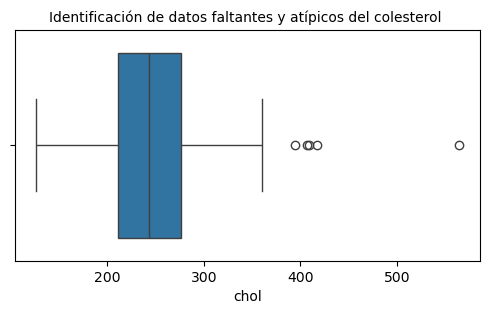

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['chol'])
plt.title('Identificación de datos faltantes y atípicos del colesterol ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos de presión arterial ')

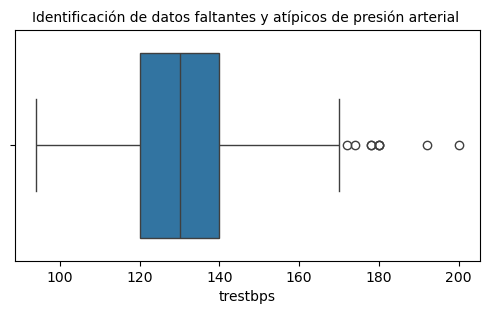

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['trestbps'])
plt.title('Identificación de datos faltantes y atípicos de presión arterial ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos de frecuencia cardiaca')

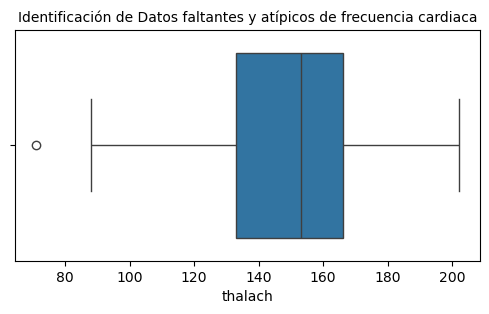

In [20]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['thalach'])
plt.title('Identificación de Datos faltantes y atípicos de frecuencia cardiaca', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [23]:
print("Cantidad de Registros con cero en age: ",dataset['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",dataset['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",dataset['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",dataset['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",dataset['oldpeak'].isin([0]).sum()) 

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  96


In [62]:
dataset['thalach']=dataset['thalach'].replace(0,dataset['thalach'].mean())
print("Cantidad de Registros con cero en thalach: ",dataset['thalach'].isin([0]).sum())

Cantidad de Registros con cero en thalach:  0


In [42]:
nivel_minimo=120
nivel_maximo=200
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 197


In [31]:
dataset=dataset[(dataset['chol']<nivel_maximo)&(dataset['chol']>nivel_minimo)]
Total_Atipicos=((dataset['chol']<nivel_minimo)|(dataset['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [64]:
nivel_minimo=60
nivel_maximo=200
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [37]:
dataset=dataset[(dataset['trestbps']<nivel_maximo)&(dataset['trestbps']>nivel_minimo)]
Total_Atipicos=((dataset['trestbps']<nivel_minimo)|(dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 1 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        241 non-null    int64  
 1   sex        241 non-null    int64  
 2   cp         241 non-null    int64  
 3   trestbps   241 non-null    int64  
 4   chol       241 non-null    int64  
 5   fbs        241 non-null    int64  
 6   restecg    241 non-null    int64  
 7   thalach    241 non-null    int64  
 8   exang      241 non-null    int64  
 9   oldpeak    241 non-null    float64
 10  slope      241 non-null    int64  
 11  ca         241 non-null    int64  
 12  thal       241 non-null    int64  
 13  condition  241 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 28.2 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

Identificar si la persona tiene alguna enfermedad cardiaca o no (0 = no tiene enfermedad cardiaca y si es 1 = si tiene enfermedad cardiaca)

In [47]:
dataset['condition'].value_counts()

condition
0    135
1    106
Name: count, dtype: int64

In [51]:
dataset[['condition']].head(40)

,condition
1,0
3,1
4,0
6,0
7,1
12,1
14,0
15,0
17,0
18,1


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [54]:
X = dataset.drop('condition',axis=1) 
Y = dataset['condition'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [56]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
267   48    1   3       124   274    0        2      166      0  0.500000   
161   67    1   3       120   229    0        2      129      1  2.600000   
266   49    0   3       130   269    0        0      163      0  1.055556   
245   54    1   3       120   188    0        0      113      0  1.400000   
254   53    1   3       142   226    0        2      111      1  1.055556   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
293   39    1   3       118   219    0        0      140      0  1.200000   
65    41    0   1       105   198    0        0      168      0  1.055556   
181   63    0   3       108   269    0        0      169      1  1.800000   
290   41    1   3       110   172    0        2      158      0  1.055556   
253   53    0   3       138   234    0        2      160      0  1.055556   

     slope  ca  thal  
267      1   0     2  
161      1   2     2  
266   

In [58]:
print (Y_train)

267    1
161    1
266    0
245    1
254    0
      ..
293    1
65     0
181    1
290    1
253    0
Name: condition, Length: 180, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [67]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

#modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [69]:
print (Y_test)

268    0
246    1
44     0
120    0
62     0
      ..
203    1
134    0
260    1
30     0
12     1
Name: condition, Length: 61, dtype: int64


In [71]:
print (Prediccion)

[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [74]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        34
           1       0.94      0.63      0.76        27

    accuracy                           0.82        61
   macro avg       0.86      0.80      0.81        61
weighted avg       0.85      0.82      0.81        61



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

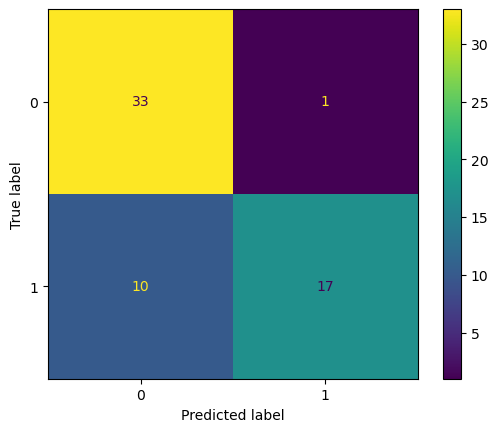

In [77]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

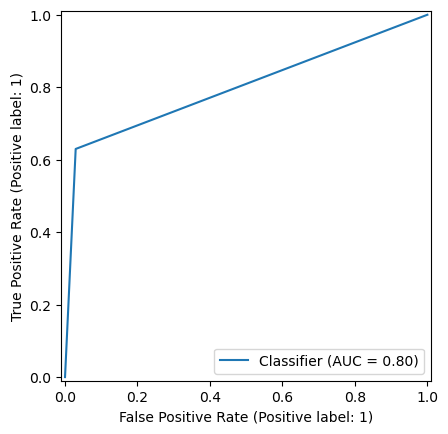

In [79]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo podemos describir:

* La precisión se define como la proporción de predicciones positivas correctas en relación con todas las predicciones positivas emitidas por el modelo.
Para la clase 'condition', la precisión es del 0.94, lo que indica que el 94% de los casos identificados como personas con problemas cardíacos por el modelo resultaron ser correctos.

* El Recall, o la tasa de verdaderos positivos, representa la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo entre todas las instancias positivas reales en el conjunto de datos.
En el caso de la clase 'condition', el Recall es del 0.63, lo que significa que el modelo identificó correctamente al 63% de todos los pacientes con enfermedades cardíacas en el conjunto de datos.

* El F1 Score, una medida que combina precisión y recall en una sola métrica, proporciona una evaluación equilibrada del desempeño del modelo.
Para la clase 'condition', el F1 Score es de 0.76, lo que refleja un el modelo tiene un desempeño aceptable demostrando una buena capacidad del modelo para identificar y clasificar casos de poseer alguna una enfermedad cardíaca

De la Matriz de Confusión podemos inferir:

- Verdaderos negativos: Representan el número de observaciones que el clasificador predijo correctamente como falsas, con un total de 33 casos.
- Verdaderos positivos: Corresponden al número de observaciones que el clasificador predijo correctamente como verdaderas, contabilizando 17 casos correctamente identificados.
- Falsos positivos: Indican el número de observaciones que el clasificador predijo incorrectamente como verdaderas cuando en realidad eran falsas, con un total de 1 caso erróneo.
-Falsos negativos: Reflejan el número de observaciones que el clasificador predijo incorrectamente como falsas cuando en realidad eran verdaderas, sumando un total de 10 casos mal clasificados.

* De la Curva de Precisión del modelo podemos interpretar:

El AUC (Área Bajo la Curva) es de 0.80, lo que indica que el 80% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/